# Tutorial sobre Regressão utilizando Pycaret
- https://pycaret.gitbook.io/docs/get-started/tutorials
- Link original: https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

Este é um tutorial básico/iniciante da biblioteca pycaret.
Mais material de conhecimento pode ser encontrato no site original acima: pycaret.gitbook.io

Abaixo, vamos tratar de:
1) Obtendo os dados: como importar dados do repositório PyCaret
    O dataset utilizado, será um estudo de caso chamado "Sarah Gets a Diamond". Os dados contém 6000 registros.
    Sobre o dataset:
    <br>1.1) ID - registro único que identifica cada diamante
    <br>1.2) Carat Weight - peso do diamante em quilates. Um quilate é igual a 0.2 gramas
    <br>1.3) Cut - Indicam o tipo de corte do diamante (Assinatura Ideal, Ideal, Muito Bom, Bom e Razoável)
    <br>1.4) Cor - São seis tipos de cores separadas em: Incolor (D, E, F) e Quase Incolor (G, H, I)
    <br>1.5) Clarity - São sete tipos de clareza: F: impecável; IF: Internamente impecável; VVS1 ou VVS2: Muito, Muito Ligeiramente Incluído ou VS1 ou VS2: Muito Ligeiramente Incluído e Sl1: Ligeiramente Incluído
    <br>1.6) Polish - Quatro valores indicam o polimento do diamante. ID: Ideal; EX: Excelente; VG: Muito Bom; G: Bom
    <br>1.7) Symmetry - Quatro valores indicam a simetria do diamante. ID: Ideal; EX: Excelente; VG: Muito Bom; G: Bom
    <br>1.8) Report - Indicam qual agência classificou o diamante AGSL ou GIA
    <br>1.9) Price - Valor avaliado em Dólares do diamante. (Variável alvo) 
2) Configurar o ambiente: como configurar o ambiente para contruir seu modelo de regressão
3) Criar um modelo: como criar um modelo, realizar validação e avaliar as métricas de regressão
4) Tune Model: ajustar os hiper parâmetros de um modelo de regressão
5) Modelo de plotagem: analisar o modelo usando gráficos
6) Finalizar o modelo: finalizando o experimento
7) Modelo de previsão: como prever com dados novos
8) Salvar/Carregar o modelo: utilização do modelo após a finalização dos passos acima

### Requisitos/Instalação/Google Colab


Requisitos:
* Recomenda-se pelo site da biblioteca pycaret a versão do Python 3.6 ou superior. (eu utilizo a versão 3.8)
* Pycaret 2.0 ou superior
* Conexão com a internet para carregar os datasets do repositório Pycaret

Instalação:
* Instalação local ou via jupyter notebook: pip install pycaret
* Instalação para uso no Google Colab ou Azure Notebooks: !pip install pycaret

Google Colab:
1) from pycaret.utils import enable_colab
2) enable_colab()

# 1) Obtendo os dados

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [26]:
dataset.shape
#abaixo, vemos que temos 6000 linhas e 8 colunas

(6000, 8)

In [3]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)
#selecionamos 90% dos dados para uso. e 10% para dados que não serão utilizados. Para treino e teste é utilizado 70/30 utilizando os 5400 registros separados.

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [40]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 
#Quando a função setup é inicializada o pycaret cria um pipeline para preparar os dados de modelagem e deploy

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


* session_id: quando um número é informado em session_id ele pode ser utilizado em próximas chamadas de execução
* Original Data: exibe os dados do experimento (5400, 8)
* Missing Values: exibe os valores nulos do dataset, neste exemplo, não temos valores nulos
* Numeric Features: neste experimento apenas um registro é numérico 
* Categorical Features:  exibe o número de features categóricas
* Transformed Train Set: (3779, 28) dados de treino
* Transformed Test Set: 1621 são os dados de teste. 70/30

In [41]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,626.7304,2011546.7483,1351.4478,0.9810,0.0669,0.0491,0.5460
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.3030
xgboost,Extreme Gradient Boosting,708.8427,2799609.2534,1607.9791,0.9724,0.0743,0.0541,0.2150
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.2630
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0860
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.0900
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0100
ridge,Ridge Regression,2413.5704,14120492.3795,3726.1643,0.8621,0.6689,0.2875,0.0060
lasso,Lasso Regression,2412.1922,14246798.1211,3744.2305,0.8608,0.6767,0.2866,0.0100
llar,Lasso Least Angle Regression,2355.6152,14272020.4389,3745.3095,0.8607,0.6391,0.2728,0.0070


# Verificando melhor modelo

In [42]:
print(best)

In [43]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [44]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,630.3834,1757141.2595,1325.5720,0.9840,0.0643,0.0481


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,6916.344705
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,5809.280890
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,10832.769404
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,2933.741874
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,22008.375054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,13389.909542
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,3562.117648
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,9180.766054
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,5161.460066


In [45]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,672.8783,1076875.3916,1037.7261,0.9882,0.0871,0.0638
1,794.9131,6189146.2301,2487.7995,0.9526,0.0808,0.0600
2,748.9454,2215828.0641,1488.5658,0.9797,0.0858,0.0636
3,644.7950,980546.9785,990.2257,0.9892,0.0755,0.0596
4,647.8681,1436071.1477,1198.3619,0.9821,0.0824,0.0602
5,776.3961,4961098.2264,2227.3523,0.9577,0.0799,0.0590
6,667.5122,1585757.6196,1259.2687,0.9851,0.0742,0.0562
7,758.8714,2360285.5230,1536.3221,0.9702,0.0858,0.0642
8,669.3512,1213663.4863,1101.6640,0.9881,0.0765,0.0589


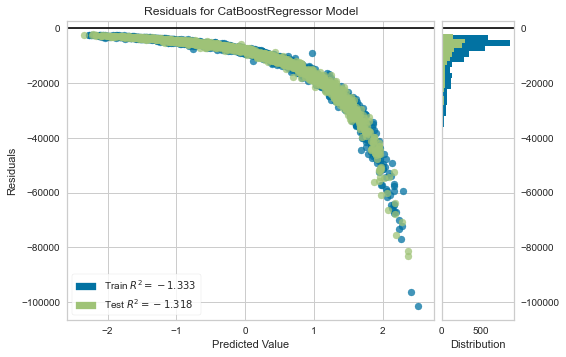

In [38]:
plot_model(tuned_best)

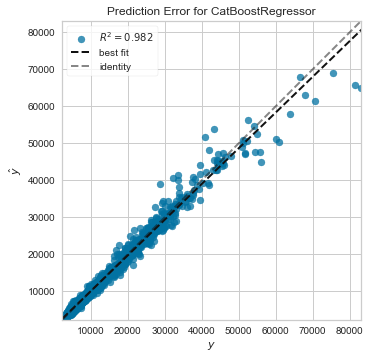

In [46]:
plot_model(tuned_best, plot = 'error')

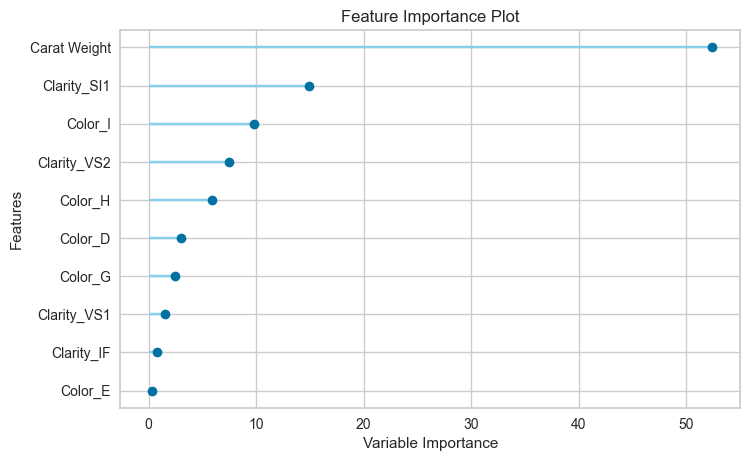

In [47]:
plot_model(tuned_best, plot='feature')

# Finalizando/Salvando o modelo

In [48]:
save_model(tuned_best,'CatBoost_Regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Price')),
                 ('fix_perfect', Remove_100(target='Price')),
                 ('clean_names', Clean_Colum_Names()),
                 ('

# Carregando modelo e prevendo dados separados no início.

In [49]:
model_loaded = load_model('CatBoost_Regressor')

Transformation Pipeline and Model Successfully Loaded


In [50]:
new_prediction = predict_model(model_loaded, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,841.7963,3516615.3477,1875.2641,0.9658,0.0875,0.0675


In [51]:
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13102.627488
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10058.740483
2,1.01,Good,E,SI1,G,G,GIA,5161,4874.903449
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,33767.663088
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4003.851219


In [52]:
plot_model(best, plot = 'residuals_interactive')

    'data': [{'hovertemplate': 'Split=train<br>Predictions…